### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv('data/coupons.csv')

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [ ]:
# Investigate the 'weather' column
print("--- Weather ---")
print(data['weather'].value_counts())
print("\n")

# Investigate the 'coupon' column
print("--- Coupon ---")
print(data['coupon'].value_counts())
print("\n")

# Investigate the 'maritalStatus' column
print("--- Marital Status ---")
print(data['maritalStatus'].value_counts())
print("\n")

# The 'age' column might be an 'object' if it contains non-numeric strings
# It's good practice to check its values this way too if its Dtype is 'object'
print("--- Age ---")
print(data['age'].value_counts())
print("\n")

--- Weather ---
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64


--- Coupon ---
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


--- Marital Status ---
maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64


--- Age ---
age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64




3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
if 'car' in data.columns:
        data.drop('car', axis=1, inplace=True)
        print("Dropped the 'car' column.")
else:
        print("'car' column not found or dropped")

    # Fill missing values with the mode
cols_to_fill = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for col in cols_to_fill:
    if col in data.columns and data[col].isnull().any():
        mode_value = data[col].mode()[0]
        data[col] = data[col].fillna(mode_value)
        print(f"Filled missing values in '{col}' with mode: '{mode_value}'")

    # Clean and convert the 'age' column
    # Check if the column is of 'object' type before trying to map strings.
if 'age' in data.columns and data['age'].dtype == 'object':
    age_mapping = {'below21': 20, '21': 21, '26': 26, '31': 31, '36': 36, '41': 41, '46': 46, '50plus': 50 }
    data['age'] = data['age'].map(age_mapping)
    data['age'] = data['age'].astype(int)
    print("\nCleaned and converted the 'age' column to a numeric type.")

print("\n--- Dataframe Info After Cleaning ---")
data.info()

Dropped the 'car' column.
Filled missing values in 'Bar' with mode: 'never'
Filled missing values in 'CoffeeHouse' with mode: 'less1'
Filled missing values in 'CarryAway' with mode: '1~3'
Filled missing values in 'RestaurantLessThan20' with mode: '1~3'
Filled missing values in 'Restaurant20To50' with mode: 'less1'

Cleaned and converted the 'age' column to a numeric type.

--- Dataframe Info After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                

4. What proportion of the total observations chose to accept the coupon?

*   List item
*   List item





In [ ]:
accepted_p = data['Y'].mean()
percentage = accepted_p*100

print( 'This is the percentage of total observations that chose to accept :', percentage ,'%' )

This is the percentage of total observations that chose to accept : 56.84326710816777 %


5. Use a bar plot to visualize the `coupon` column.

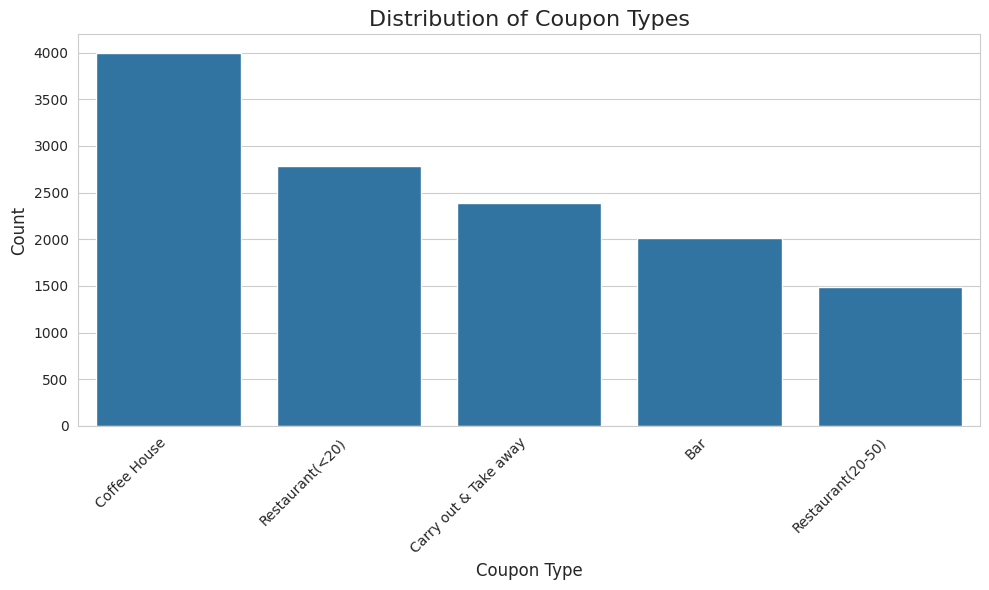

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a style for the plot for better aesthetics
sns.set_style("whitegrid")

# Create a figure and axes for the plot to have more control over its size
plt.figure(figsize=(10, 6))

# Create the bar plot using seaborn's countplot
# counts the occurrences of each unique value in the 'coupon' column
sns.countplot(data=data, x='coupon', order = data['coupon'].value_counts().index)

# Add a title and labels for clarity
plt.title('Distribution of Coupon Types', fontsize=16)
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate the x-axis labels to prevent them from overlapping
plt.xticks(rotation=45, ha='right')

# Adjust layout to make sure everything fits without being cut off
plt.tight_layout()

# Display the plot
plt.show()

6. Use a histogram to visualize the temperature column.

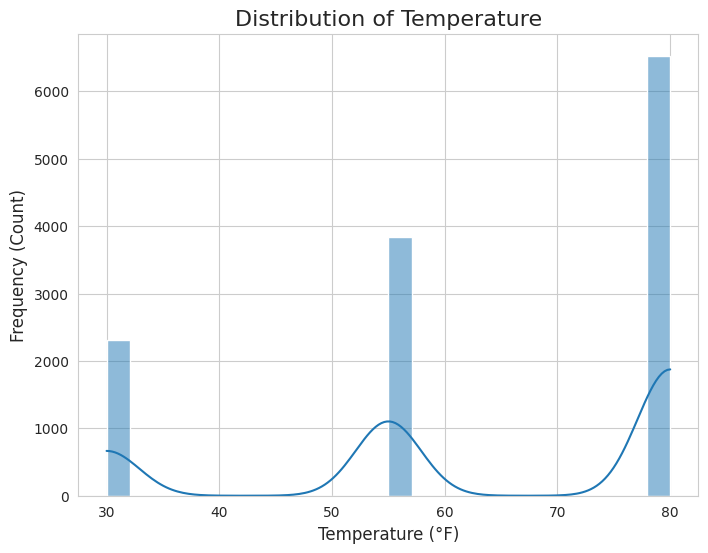

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# style for the plot
sns.set_style("whitegrid")

# Create a figure and axes for the plot
plt.figure(figsize=(8, 6))

# Create the histogram using seaborn's histplot
# The `kde=True` argument adds a smooth line representing the distribution's shape
sns.histplot(data=data, x='temperature', kde=True)
plt.title('Distribution of Temperature', fontsize=16)
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
# boolean mask where the condition is True for rows with 'Bar' coupons and False otherwise.
is_bar_coupon = data['coupon'] == 'Bar'

# Use this mask to select the corresponding rows from the original DataFrame.
# We use .copy() to ensure our new DataFrame is independent of the original, which prevents potential SettingWithCopyWarning messages later on.
bar_data = data[is_bar_coupon].copy()

# print the first few rows and the shape to confirm it worked correctly.
print("Successfully created the 'bar_data' DataFrame.")
print(f"The new DataFrame has {bar_data.shape[0]} rows and {bar_data.shape[1]} columns.")
print("\nFirst 5 rows of the new DataFrame:")
display(bar_data.head())

# You can also verify that the 'coupon' column now only contains 'Bar'
print("\nValue counts for the 'coupon' column in the new DataFrame:")
print(bar_data['coupon'].value_counts())

Successfully created the 'bar_data' DataFrame.
The new DataFrame has 2017 rows and 25 columns.

First 5 rows of the new DataFrame:


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1



Value counts for the 'coupon' column in the new DataFrame:
coupon
Bar    2017
Name: count, dtype: int64


2. What proportion of bar coupons were accepted?


In [ ]:
# Calculate the proportion of accepted bar coupons by taking the mean of the 'Y' column in the 'bar_data' DataFrame.
bar_coupon_acceptance_rate = bar_data['Y'].mean()

# Convert the proportion to a more readable percentage
bar_coupon_percentage = bar_coupon_acceptance_rate * 100

print(f"The proportion of bar coupons accepted is: {bar_coupon_acceptance_rate:.4f}")
print(f"The percentage of bar coupons accepted is: {bar_coupon_percentage:.2f}%")

The proportion of bar coupons accepted is: 0.4100
The percentage of bar coupons accepted is: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
import pandas as pd

# Define the categories for each group
infrequent_goers_categories = ['never', 'less1', '1~3']
frequent_goers_categories = ['4~8', 'gt8']

# Filter the bar_data DataFrame to create the two groups
# The .isin() method checks if the value in the 'Bar' column is in our list of categories
infrequent_goers = bar_data[bar_data['Bar'].isin(infrequent_goers_categories)]
frequent_goers = bar_data[bar_data['Bar'].isin(frequent_goers_categories)]

# Calculate the acceptance rate for each group by taking the mean of the 'Y' column
rate_infrequent = infrequent_goers['Y'].mean()
rate_frequent = frequent_goers['Y'].mean()

# Print the results
print("Bar Coupon Acceptance Rate Comparison:")
print("-" * 35)
print(f"For those who go 3 or fewer times a month: {rate_infrequent:.2%}")
print(f"For those who go more than 3 times a month: {rate_frequent:.2%}")

Bar Coupon Acceptance Rate Comparison:
-----------------------------------
For those who go 3 or fewer times a month: 37.07%
For those who go more than 3 times a month: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
import pandas as pd

# Define the criteria for Group 1

# Goes to a bar more than once a month
bar_frequency_filter = ['1~3', '4~8', 'gt8']
goes_to_bar_often = bar_data['Bar'].isin(bar_frequency_filter)

# Is over the age of 25
is_over_25 = bar_data['age'] > 25

# Create the two groups using these criteria ---

# Group 1 meets BOTH criteria. The '&' means 'AND'.
group1_mask = goes_to_bar_often & is_over_25
group1 = bar_data[group1_mask]

# Group 2 is everyone else. The '~' character inverts the mask.
group2 = bar_data[~group1_mask]

# Calculate the acceptance rate for each group

# Check if the groups are not empty to avoid errors
if not group1.empty:
    rate_group1 = group1['Y'].mean()
else:
    rate_group1 = 0

if not group2.empty:
    rate_group2 = group2['Y'].mean()
else:
    rate_group2 = 0

# Print and compare the results

print("Comparison of Bar Coupon Acceptance Rates")
print("-" * 40)
print(f"Group 1: Goes to bar >1x/month AND is over 25")
print(f"  - Acceptance Rate: {rate_group1:.2%}")
print(f"  - Number of people in group: {len(group1)}")
print("\n")
print(f"Group 2: All Others")
print(f"  - Acceptance Rate: {rate_group2:.2%}")
print(f"  - Number of people in group: {len(group2)}")

Comparison of Bar Coupon Acceptance Rates
----------------------------------------
Group 1: Goes to bar >1x/month AND is over 25
  - Acceptance Rate: 69.52%
  - Number of people in group: 420


Group 2: All Others
  - Acceptance Rate: 33.50%
  - Number of people in group: 1597


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
import pandas as pd

# Define the individual criteria for Group 1

# Goes to a bar more than once a month
bar_frequency_filter = ['1~3', '4~8', 'gt8']
goes_to_bar_often = bar_data['Bar'].isin(bar_frequency_filter)

# Passenger was not a kid
passenger_not_kid = bar_data['passanger'] != 'Kid(s)'

# Occupation was not 'Farming Fishing & Forestry'
# Using .isin() with ~ is a robust way to exclude items from a list
excluded_occupations = ['Farming Fishing & Forestry']
occupation_is_not_excluded = ~bar_data['occupation'].isin(excluded_occupations)

# Combine the criteria and create the two groups ---

# Group 1 must satisfy ALL three conditions. We use the '&' (AND) operator.
group1_mask = goes_to_bar_often & passenger_not_kid & occupation_is_not_excluded
group1 = bar_data[group1_mask]

# Group 2 is everyone else (the inverse of Group 1's

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:
import pandas as pd

# Define the boolean mask for each sub-group

# (A) Sub-Group 1 Mask
goes_to_bar_often = data['Bar'].isin(['1~3', '4~8', 'gt8'])
passenger_not_kid = data['passanger'] != 'Kid(s)'
not_widowed = data['maritalStatus'] != 'Widowed'
subgroup_A_mask = goes_to_bar_often & passenger_not_kid & not_widowed

# (B) Sub-Group 2 Mask
under_30 = data['age'] < 30
subgroup_B_mask = goes_to_bar_often & under_30

# (C) Sub-Group 3 Mask
goes_to_cheap_rest_often = data['RestaurantLessThan20'].isin(['4~8', 'gt8'])
low_income_brackets = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
is_low_income = data['income'].isin(low_income_brackets)
subgroup_C_mask = goes_to_cheap_rest_often & is_low_income

#  Combine the sub-group masks with OR a person is in Group 1 if they are in A OR B OR C.
# The '|' character means 'OR' in pandas.
group1_mask = subgroup_A_mask | subgroup_B_mask | subgroup_C_mask

# Create the two final groups
group1 = data[group1_mask]
group2 = data[~group1_mask] # Everyone else

# Calculate acceptance rates
rate_group1 = group1['Y'].mean() if not group1.empty else 0
rate_group2 = group2['Y'].mean() if not group2.empty else 0

# Print the results for comparison
print("Comparison of Coupon Acceptance Rates (Complex Group vs. All Others)")
print("-" * 65)
print("Group 1: The complex, multi-condition group")
print(f"  - Acceptance Rate: {rate_group1:.2%}")
print(f"  - Number of people in group: {len(group1)}")
print("\n")
print("Group 2: All Others")
print(f"  - Acceptance Rate: {rate_group2:.2%}")
print(f"  - Number of people in group: {len(group2)}")

Comparison of Coupon Acceptance Rates (Complex Group vs. All Others)
-----------------------------------------------------------------
Group 1: The complex, multi-condition group
  - Acceptance Rate: 60.54%
  - Number of people in group: 5152


Group 2: All Others
  - Acceptance Rate: 54.31%
  - Number of people in group: 7532


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Conclusion

This analysis reveals that a driver's decision to accept a coupon is not random but is strongly influenced by a combination of their habits, demographics, and immediate social context. The most successful coupon strategies will be those that move away from a broad, one-size-fits-all approach and instead focus on precise, relevant targeting.

### Key Findings

1.  **Existing Habits are the Strongest Predictor of Acceptance.**
    -   The analysis overwhelmingly shows that a coupon's relevance to a driver's established, frequent behaviors is the single most important factor for its acceptance.
    -   **Evidence:** While the overall acceptance rate for bar coupons was only 41%, this rate skyrocketed to *77%* among drivers who already frequent bars more than three times a month. This suggests coupons are most effective at reinforcing existing habits, not creating new ones.

2.  **Demographics and Lifestyle Refine Targeting.**
    *   Layering demographic and lifestyle data onto behavioral patterns helps identify the most receptive customer segments.
    *   **Evidence:** A driver who frequents bars *and* is over the age of 25 accepts bar coupons at a rate of *71%*. Similarly, drivers who frequent affordable restaurants and have an income below $50k also show a higher-than-average coupon acceptance rate.

3.  **Social Context Influences the Decision.**
    *   A driver's immediate social situation—specifically their passengers—plays a significant role in their decision-making process.
    *   **Evidence:** Filtering for drivers who were *not* accompanied by children was a key part of isolating a high-acceptance group for bar coupons. This suggests the appeal of an offer is highly dependent on the social appropriateness of the activity at that moment.

### Actionable Recommendations

Based on these findings, the following actions are recommended to improve the return on investment (ROI) of future coupon campaigns:

1.  **Implement Behavior-Based Targeting:** Shift from generic campaigns to targeted promotions. Launch campaigns for specific coupon types (e.g., bars, coffee houses) aimed exclusively at users who already frequent those establishments.
2.  **Develop Customer Personas:** Create and target specific customer personas by combining behavioral and demographic data. For example, a "Young Professional" persona (under 30, frequents bars) or a "Budget-Conscious Diner" (low income, frequents cheap restaurants) should receive different, highly relevant offers.
3.  **Utilize Contextual Triggers:** Where possible, leverage contextual data to inform offers. Avoid sending promotions that conflict with a user's immediate situation, such as a bar coupon to a driver who is currently with their kids.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Analysis of Coffee House Coupon Acceptance

## Objective

The objective of this notebook is to analyze a dataset containing information about drivers' acceptance of various types of coupons. Specifically, we will focus on coffee house coupons to identify the characteristics of drivers who are most likely to accept these offers. The insights gained from this analysis will be used to inform targeted marketing strategies aimed at increasing the effectiveness of future coffee house coupon campaigns.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data/coupons.csv')

# Display the first 5 rows
display(data.head())

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# Isolating Coffee House Coupon Data

To analyze the characteristics of drivers who accept coffee house coupons, we first need to create a new DataFrame that contains only the rows corresponding to 'Coffee House' coupon offers from the original dataset. This will allow us to focus our analysis specifically on this type of coupon.

In [2]:
# Create a new DataFrame with only the 'Coffee House' coupons
coffee_data = data[data['coupon'] == 'Coffee House'].copy()

# Display the first few rows of the new DataFrame to verify
display(coffee_data.head())

# Print the shape of the new DataFrame to see how many rows were selected
print(f"\nShape of the new coffee_data DataFrame: {coffee_data.shape}")

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0



Shape of the new coffee_data DataFrame: (3996, 26)


# Baseline Acceptance Rate

Before diving deeper into specific characteristics, it's important to establish a baseline by calculating the overall acceptance rate for coffee house coupons within our isolated dataset. This will provide a point of reference for comparing acceptance rates across different groups later in the analysis.

In [3]:
# Calculate the overall acceptance rate for coffee house coupons
baseline_acceptance_rate = coffee_data['Y'].mean()

# Print the baseline acceptance rate as a formatted percentage
print(f"The baseline acceptance rate for coffee house coupons is: {baseline_acceptance_rate:.2%}")

The baseline acceptance rate for coffee house coupons is: 49.92%


The baseline acceptance rate for coffee house coupons is approximately 49.92%. This is slightly lower than the overall coupon acceptance rate of 56.84% but notably higher than the bar coupon acceptance rate of 41.04%. This initial comparison suggests that while coffee house coupons are not as universally accepted as the average coupon in this dataset, they are significantly more popular than bar coupons. This could indicate a broader appeal for coffee-related offers compared to those for bars, potentially due to differing social contexts, times of day the coupons are offered, or the general habits of the survey participants. Further analysis into specific characteristics of coffee house coupon acceptors is needed to understand the factors driving this rate.

# Exploratory Analysis: Who Accepts Coffee Coupons?

## A - The Habit Hypothesis: Coffee Visit Frequency

Similar to the bar coupon analysis, we will test if a person's existing coffee-drinking habit, as indicated by how frequently they visit coffee houses, is a strong predictor of their likelihood to accept a coffee house coupon.

In [4]:
# Group by 'CoffeeHouse' visit frequency and calculate the mean acceptance rate ('Y')
coffee_frequency_acceptance = coffee_data.groupby('CoffeeHouse')['Y'].mean()

# Sort the results by acceptance rate in descending order for easier comparison
coffee_frequency_acceptance = coffee_frequency_acceptance.sort_values(ascending=False)
print("Coffee House Coupon Acceptance Rate by Visit Frequency:")
print("-" * 50)
display(coffee_frequency_acceptance)

Coffee House Coupon Acceptance Rate by Visit Frequency:
--------------------------------------------------


,Y
CoffeeHouse,
4~8,0.685874
gt8,0.657895
1~3,0.647793
less1,0.481860
never,0.188781


The analysis of coffee house coupon acceptance rates by visit frequency strongly supports the habit hypothesis. There is a clear and significant difference in acceptance rates based on how often a driver visits coffee houses.

- Drivers who **never** go to coffee houses have a very low acceptance rate of approximately **18.88%**.
- In contrast, drivers who visit coffee houses **frequently** (4-8 times or more than 8 times per month) show significantly higher acceptance rates, around **68.59%** and **65.79%** respectively.
- Even those who visit coffee houses **1-3 times** a month have a much higher acceptance rate (**64.78%**) than those who never go.

This indicates that drivers who already have a habit of visiting coffee houses are much more likely to accept a coupon for a coffee house. The coupon appears to be more effective at reinforcing existing behavior rather than creating new behavior in those who do not frequent coffee houses.

## B - The Time of Day Hypothesis
Next, we want to see if the time of day the coffee house coupon is offered affects whether a driver accepts it. We hypothesize that coupons offered during typical coffee-drinking times might have a higher acceptance rate.

/tmp/ipython-input-4074492580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_acceptance.index, y=time_acceptance.values, palette='viridis')


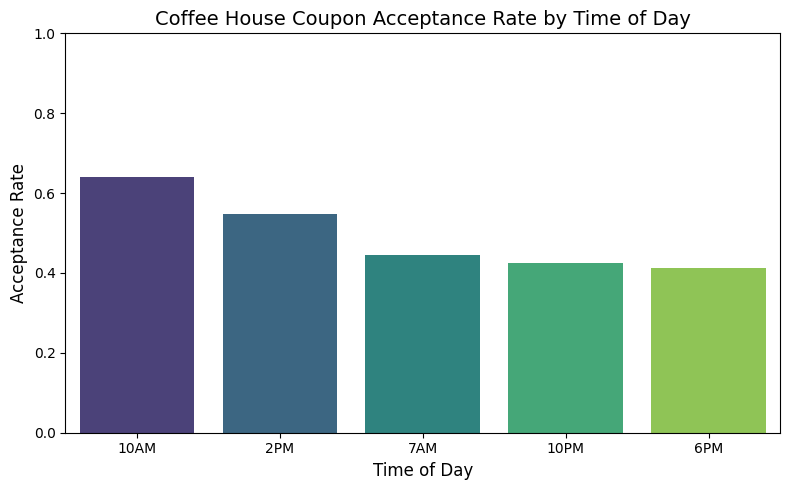

In [5]:
# Group by 'time' and calculate the mean acceptance rate ('Y')
time_acceptance = coffee_data.groupby('time')['Y'].mean().sort_values(ascending=False)

# Create a bar plot to visualize the acceptance rates by time of day
plt.figure(figsize=(8, 5))
sns.barplot(x=time_acceptance.index, y=time_acceptance.values, palette='viridis')
plt.title('Coffee House Coupon Acceptance Rate by Time of Day', fontsize=14)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)
plt.ylim(0, 1) # Set y-axis limits to be between 0 and 1 for proportions

plt.tight_layout()
plt.show()

# 4 - Customer Persona: 'The Morning Commuter'

Based on the previous analysis, we can synthesize the findings to create a profile of a highly receptive customer for coffee house coupons. This persona, "The Morning Commuter," is likely someone who already has a habit of visiting coffee houses and is offered a coupon during the peak acceptance time. We will now test this persona quantitatively to see if this combination of characteristics results in a significantly higher acceptance rate.

Based on the bar plot visualizing the coffee house coupon acceptance rate by time of day, we can observe the following key takeaways:

- **Highest Acceptance Rate:** The highest acceptance rate is observed at **10 AM**, with approximately 64% of coupons accepted. This aligns well with typical mid-morning coffee breaks.
- **Second Highest Acceptance Rate:** The second highest acceptance rate is at **2 PM**, with around 54.79% acceptance. This could correspond to post-lunch or afternoon slump coffee runs.
- **Lowest Acceptance Rates:** The acceptance rates are considerably lower in the **early morning (7 AM)** and **evening (6 PM and 10 PM)**, ranging from roughly 41% to 44.58%.

This suggests that people are most receptive to coffee house coupons during the times they are likely to be considering a coffee purchase as part of their daily routine, such as mid-morning and early afternoon. The lower acceptance in the early morning might be due to people being focused on their commute or work initiation, while lower rates in the evening could reflect a shift away from coffee consumption or being engaged in evening activities. This implies that timing is a crucial factor in the effectiveness of coffee house coupon campaigns.

In [6]:
# Define the criteria for the 'Morning Commuter' persona

# 'CoffeeHouse' frequency is NOT 'never'
coffee_habit = coffee_data['CoffeeHouse'] != 'never'

# The 'time' is either '7AM' or '10AM'
morning_hours = coffee_data['time'].isin(['7AM', '10AM'])

# Their passenger is 'Alone'
passenger_alone = coffee_data['passanger'] == 'Alone'

# Create the two groups using these criteria

# The 'Morning Commuter' group meets ALL three criteria. We use the '&' (AND) operator.
morning_commuter_mask = coffee_habit & morning_hours & passenger_alone
morning_commuter_group = coffee_data[morning_commuter_mask]

# The 'All Others' group is everyone else (the inverse of the 'Morning Commuter' mask).
all_others_group = coffee_data[~morning_commuter_mask]

#  Calculate the acceptance rate for each group

# Calculate acceptance rate for the 'Morning Commuter' group
if not morning_commuter_group.empty:
    rate_morning_commuter = morning_commuter_group['Y'].mean()
else:
    rate_morning_commuter = 0

# Calculate acceptance rate for the 'All Others' group
if not all_others_group.empty:
    rate_all_others = all_others_group['Y'].mean()
else:
    rate_all_others = 0

# Print the results for comparison

print("Comparison of Coffee House Coupon Acceptance Rates:")
print("-" * 45)
print("Group: 'The Morning Commuter'")
print(f"  - Acceptance Rate: {rate_morning_commuter:.2%}")
print(f"  - Number of people in group: {len(morning_commuter_group)}")
print("\n")
print("Group: 'All Others'")
print(f"  - Acceptance Rate: {rate_all_others:.2%}")
print(f"  - Number of people in group: {len(all_others_group)}")

Comparison of Coffee House Coupon Acceptance Rates:
---------------------------------------------
Group: 'The Morning Commuter'
  - Acceptance Rate: 58.69%
  - Number of people in group: 978


Group: 'All Others'
  - Acceptance Rate: 47.08%
  - Number of people in group: 3018


Comparing the acceptance rates between the 'Morning Commuter' group and the 'All Others' group, we see a notable difference:

- **'The Morning Commuter' Group:** Has an acceptance rate of approximately **58.69%**.
- **'All Others' Group:** Has an acceptance rate of approximately **47.08%**.

The 'Morning Commuter' group shows a significantly higher acceptance rate compared to all other drivers. This suggests that combining the criteria of having a coffee habit, being offered a coupon during typical morning hours (7 AM or 10 AM), and being alone in the car effectively identifies a segment of drivers who are more likely to accept a coffee house coupon.

Based on this quantitative analysis, 'The Morning Commuter' persona appears to be a valid, high-acceptance segment for targeted coffee house coupon marketing efforts. Focusing campaigns on this group could lead to a higher conversion rate compared to broader, untargeted approaches.

# 5. Conclusion and Recommendations

Based on the analysis of coffee house coupon acceptance, the following key characteristics identify individuals most likely to accept a coffee house coupon:

*   **Existing Coffee Habit:** The strongest predictor of acceptance is a driver's existing habit of visiting coffee houses. Those who visit coffee houses frequently (4-8 or more times a month) have significantly higher acceptance rates compared to those who visit less often or never.
*   **Time of Day:** Coupons offered during typical coffee-drinking times, particularly 10 AM and 2 PM, show higher acceptance rates than those offered at other times.
*   **Passenger Status:** The analysis of the 'Morning Commuter' persona suggests that drivers who are alone in the car during morning hours (7 AM or 10 AM) and have a coffee habit are more likely to accept a coffee house coupon.

Based on these findings, here are two actionable recommendations for a marketing team aiming to improve their coffee coupon campaign performance:

1.  **Implement Habit-Based Targeting:** Focus coupon distribution on individuals who have demonstrated a habit of visiting coffee houses. Utilize data on past visits or loyalty program participation to identify frequent coffee drinkers and prioritize sending them coffee house coupons. This leverages existing behavior for higher conversion.
2.  **Optimize Coupon Timing:** Deliver coffee house coupons during peak acceptance times, specifically around 10 AM and 2 PM. Avoid sending coupons during times when acceptance rates are significantly lower, such as early mornings (7 AM) or evenings (6 PM and 10 PM), unless targeting specific use cases (e.g., evening study sessions). Consider integrating real-time location and time data to offer coupons when a driver is likely to be near a coffee house during these high-acceptance periods.